In [28]:
import pandas as pd
from matplotlib import pyplot as plt 
import re
import spacy
from spacy import displacy
import random

In [2]:
df = pd.read_csv("../data/display_data.csv")

In [3]:
df.sample(5)

,content,category
7271,Three months after amending the Indian Institu...,education
9395,The National Aeronautics and Space Administrat...,technology
2942,"In March, Google rolled out a complete design ...",technology
1056,Fitch Ratings on Thursday said the pace of Ind...,business
3162,Tech News Today in India: Rockstar Games has r...,technology


In [5]:
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [6]:
# Apply preprocessing to the article descriptions
df['clean_content'] = df['content'].apply(preprocess_text)

In [7]:
def get_named_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

In [8]:
df['named_entities'] = df['clean_content'].apply(get_named_entities)

In [9]:
df.head()

,content,category,clean_content,named_entities
0,DU Admissions 2023: The Delhi University today...,education,du admissions the delhi university today anno...,"[(the delhi university, ORG), (today, DATE), (..."
1,After winning the bronze medal in the men’s 25...,sports,after winning the bronze medal in the mens m r...,"[(cairo, GPE), (thursday, DATE), (afternoon, T..."
2,Some footballing inevitabilities of the New Ye...,sports,some footballing inevitabilities of the new ye...,"[(the new year, DATE), (two, CARDINAL), (manch..."
3,"Playing his 100th Test, Cheteshwar Pujara on S...",sports,playing his th test cheteshwar pujara on sunda...,"[(sunday, DATE), (india, GPE), (six, CARDINAL)..."
4,Reliance Industries chairman Mukesh Ambani ove...,business,reliance industries chairman mukesh ambani ove...,"[(mukesh ambani, PERSON), (indian, NORP), (one..."


In [10]:
all_entities = [entity for entities in df['named_entities'] for entity in entities]

# Convert to a DataFrame for easier analysis
entities_df = pd.DataFrame(all_entities, columns=['Entity', 'Type'])

# Count the occurrences of each entity type
entity_counts = entities_df['Type'].value_counts()

In [33]:
entities_df

,Entity,Type
0,the delhi university,ORG
1,today,DATE
2,csas,ORG
3,today,DATE
4,july,DATE
...,...,...
108621,last week,DATE
108622,several hundred,CARDINAL
108623,last month,DATE
108624,microsoft,ORG


In [36]:
entities_df.to_csv("../data/entity_df.csv", index=False)

In [11]:
print(entity_counts)

Type
DATE           31138
GPE            20217
PERSON         16109
ORG            12274
NORP            9507
CARDINAL        8719
ORDINAL         6373
TIME            1597
LOC              932
MONEY            411
FAC              355
EVENT            303
PRODUCT          286
QUANTITY         217
LANGUAGE         136
LAW               23
WORK_OF_ART       21
PERCENT            8
Name: count, dtype: int64


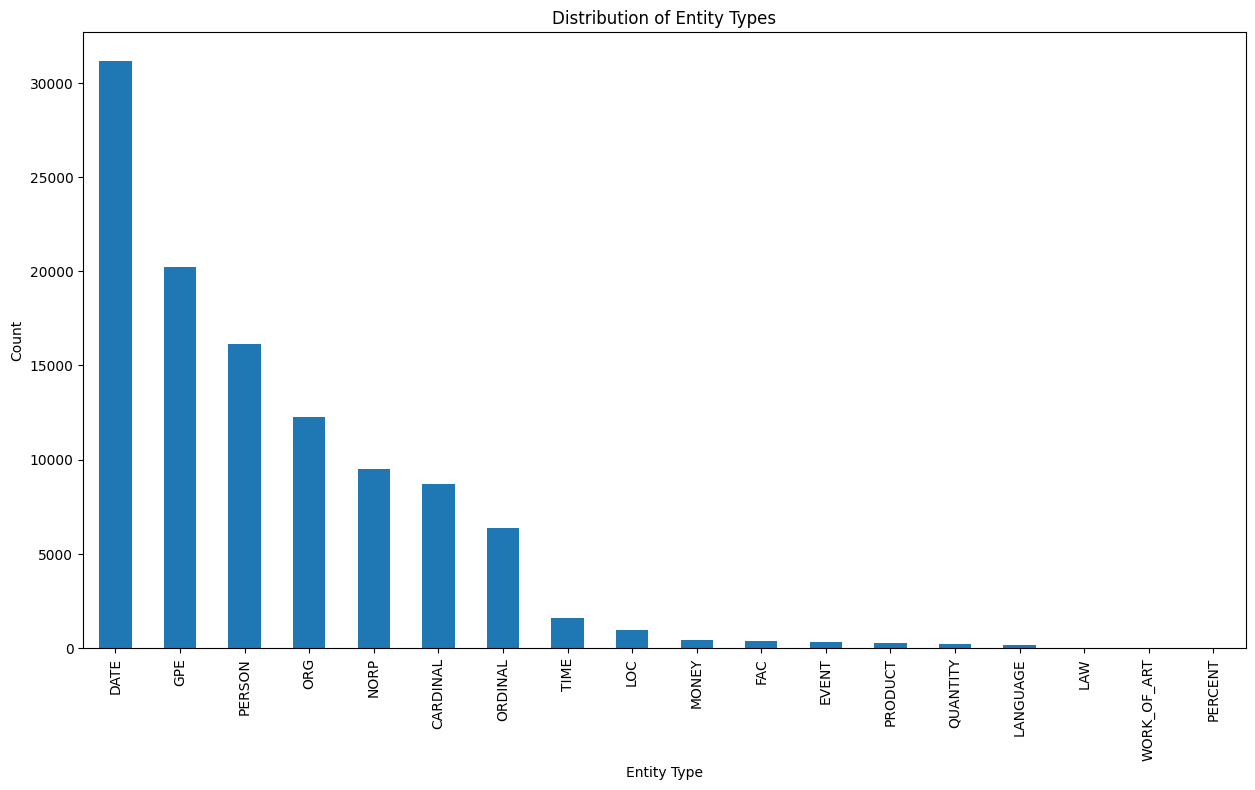

In [18]:
entity_counts.plot(kind='bar', figsize=(15, 8))
plt.title('Distribution of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.show()

In [32]:
random_index = random.randint(0, 10000)
original_text = df['content'][random_index]

print(f"Using observation number {random_index}.")

doc = nlp(original_text)
displacy.render(doc, style='ent', jupyter=True)

Using observation number 266.
